# Before starting...

Using jupyter notebook ...

Two choices: 
1. **Open** this notebook and follow along the presentation
    * Open terminal
    * Type `jupyter-notebook Introduction_Machine_Learning.ipynb`
2. **Create** your own notebook and reproduce the different steps (warning!)
    * Open terminal
    * Type `jupyter-notebook My_ML_Notebook.ipynb`

we start by **importing** the basic libraries 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


___
# Machine learning

### Definition
> ML is a set of methods that can **automatically detect patterns** in data, and then use the uncovered patterns to **predict future data** (*from Machine Learning: A Probabilistic Perspective (Murphy 2012)*)

### Phases

1. **Training** an algorithm in machine learning means detecting patterns in a dataset
1. **Testing** an algorithm means predicting future data, that is generalizing the uncovered trained patterns to new datasets

### General workflow

1. Load **datasets**:
    * A **training dataset** 
        * it will be denoted as `X_train` 
        * in supervised setting, datasets also include a list of labels `y_train` associated to the samples in `X_train`
        
    * A **testing dataset** 
        * it will be denoted `X_test`
        * in supervised setting, the list of labels is `y_test`

1. Train the algorithm on the training dataset

1. Test the trained algorithm on the testing dataset

### Machine learning in python: scikit-learn

We will demonstrate machine learning methods with scikit-learn (sklearn), one the most used machine learning library in python. If you don't have the library installed, you can refer to the [Instructions to workshop participants](https://github.com/florisvanvugt/workshop4june2017).

In [9]:
# Test if sklearn is installed:
import sklearn

**Sklearn API**: http://scikit-learn.org/stable/modules/classes.html

___
# Toy Example: Iris Dataset

### Description

This dataset consists of 3 different types of irises’ (**Setosa**, **Versicolour**, and **Virginica**) given by their:
* Sepal Length
* Sepal Width
* Petal Length 
* Petal Width.

The classes are encoded as integers: 
* Setosa = 0
* Versicolour = 1
* Virginica = 2

Rows are the samples and the columns the feature dimensions (Sepal Length, Sepal Width, Petal Length and Petal Width).

### Iris dataset in sklearn

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
features = iris.data
labels = iris.target

In [ ]:
print('Number of observations:', len(features), ' | Dimension:', len(features[0]))

In [ ]:
features[:5,:]

In [ ]:
labels

### Visualizing the dataset

**Problem:** Feature dimension is **4**, which makes it hard to visualize in a simple 2-d plot. 

_Choice 1:_ we select only the two first dimensions and visualize them in a scatter plot.

In [ ]:
data_x = features[:,0] # sepal length
data_y = features[:,1] # sepal width

In [ ]:
scatter(data_x, data_y, c=labels)

In [74]:
# explicit color for labels
color_table = [[1.,0.,0.], [0.,1.,0.], [0.,0.,1.]]
label_colors = [ color_table[l] for l in labels ]
scatter(data_x, data_y, c=label_colors)

IndexError: list index out of range

In [ ]:
data_x = features[:,2] # petal length
data_y = features[:,3] # petal width

In [ ]:
scatter(data_x, data_y, c=label_colors)

___
# Training a Classifier on the Dataset

As use case, we will explore classifier training with the **Support Vector Machine (SVM)**

The support vector machine, in its simplest version, is a **linear discriminant model**. 

Some usfule readings to know more about SVM:
* C Cortes, V Vapnik. Support-vector networks. _Machine learning_ 20 (3), 273-297, 1995
* B Schölkopf, AJ Smola. Learning with kernels: support vector machines, regularization, optimization, and beyond. *MIT press*, 2002

### SVM in sklearn

In [32]:
from sklearn import svm

Initialize a new SVM instance called `classifier`:

In [ ]:
classifier = svm.SVC()

In [ ]:
classifier

We use the linear version (simpler) of support vector machine:

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier

### Training a SVM

Classification is a supervised learning task, meaning that it learns the function mapping feature samples to known labels. 

In [ ]:
for n in range(len(features)):
    print(features[n,:], '\t==> ', labels[n])

Training on the full dataset:

In [ ]:
classifier.fit(features, labels);

Training on the two dimensions visualized previously:

In [ ]:
classifier.fit(features[:,2:], labels);

**NOTES**
* `fit` is the generic function to train any methods in sklearn
* for supervised methods, `fit` accepts two arguments: the feature data and their labels, that is `fit(X_train, y_train)`
* for unsupervised methods, `fit` accepts only one argument: the feature data, that is `fit(X_train)`

### Understanding training in SVM

Understanding training procedure in machine learning starts by understanding the **decision boundary** which is the set of borders delimiting regions in the feature space associated to each labels. 

Let's take the two last dimensions of the iris data

In [ ]:
scatter(features[:,2], features[:,3], c=label_colors)

Let's consider only two classes given by the <span style="color:#DD0000;">**RED**</span> and <span style="color:#00DD00;">**GREEN**</span> colours (class 0 and 1 respectively)

In [ ]:
np.where( (labels == 0) | (labels == 1) )

In [ ]:
class_indexes = np.where( (labels == 0) | (labels == 1) )[0]

In [ ]:
X_train = features[class_indexes, 2:]
y_train = labels[class_indexes]

In [ ]:
label_colors_2classes = np.array(label_colors)[class_indexes]

In [ ]:
scatter(X_train[:,0], X_train[:,1], c=label_colors_2classes)

**Question: what is the best decision boundary between classes 0 and 1?**

Linear models, such as SVM, consider linear decision boundaries, which means here a **line**!

A line can be define by 2 parameters:

In [ ]:
slope = -0.1
intercept = 1.2

We generate the corresponding line:

In [ ]:
boundary_x = np.linspace(1,5)
boundary_y = slope * boundary_x + intercept

In [ ]:
scatter(X_train[:,0], X_train[:,1], c=label_colors_2classes)
plot(boundary_x, boundary_y, '-k')

**Is that good enough?**

In [ ]:
scatter(X_train[:,0], X_train[:,1], c=label_colors_2classes)
plot(boundary_x, boundary_y, '-k')
scatter(3.5, 0.7, c='#444444', s=400)

Trying with other parameters:

In [ ]:
slope = -1.0
intercept = 3.2

In [ ]:
boundary_x = np.linspace(1,4)
boundary_y = slope * boundary_x + intercept

scatter(X_train[:,0], X_train[:,1], c=label_colors_2classes)
plot(boundary_x, boundary_y, '-k')

=> Looks better....

<span style="color:#AA1111; font-size: 16px;">TRAINING</span>
* means finding the best parameters wrt the set of samples
* can often be understood as an OPTIMIZATION problem (i.e. finding a decision boundary such as miminzing a certain **cost function**)

#### Inspecting the result given by **SVM**

Train classifier with the sub-dataset comprised of only 2 classes:

In [ ]:
classifier.fit(X_train, y_train);

Result of training is given by the the `coef_` structure:

In [ ]:
coefs = classifier.coef_[0]

In [ ]:
slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[0] / coefs[1]

In [ ]:
slope

In [ ]:
intercept

In [ ]:
boundary_x = np.linspace(1.5,3.5)
boundary_y = slope * boundary_x - intercept

In [ ]:
scatter(X_train[:,0], X_train[:,1], c=label_colors_2classes)
plot(boundary_x, boundary_y, '-k')

### Dealing with more than one class

In [ ]:
X_train = features[:,2:]
y_train = labels

In [ ]:
classifier.fit(X_train, y_train);

When dealing with more than one class, SVM finds decision boundaries between pair of classes:
* Class 1 vs. Class 2
* Class 1 vs. Class 3
* Class 2 vs. Class 3

#### Plotting decision boundary between Class 1 [white] and Class 3 [black]

In [ ]:
case = 1

coefs = classifier.coef_[case]

slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[case] / coefs[1]

boundary_x = np.linspace(0,10)
boundary_y = slope * boundary_x - intercept

scatter(X_train[:,0], X_train[:,1], c=label_colors)
plot(boundary_x, boundary_y, '-k')

xlim([0.5,7.5])
ylim([-0.5,3.0])

Plotting decision boundary between Class 2 [grey] and Class 3 [black]

In [ ]:
case = 2

coefs = classifier.coef_[case]

slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[case] / coefs[1]

boundary_x = np.linspace(0,10)
boundary_y = slope * boundary_x - intercept

scatter(X_train[:,0], X_train[:,1], c=label_colors)
plot(boundary_x, boundary_y, '-k')

xlim([0.5,7.5])
ylim([-0.5,3.0])

#### Visualizing the partitions the underlying vector space

In [ ]:
xx = np.linspace(0.5, 7.5, 200)
yy = np.linspace(-0.5, 3.0, 200)

In [ ]:
zz = np.zeros((xx.shape[0],yy.shape[0]))
for i in range(len(xx)):
    for j in range(len(yy)):
        zz[i,j] = classifier.predict( np.array([xx[i],yy[j]]).reshape(1,-1) )

In [ ]:
pcolormesh(xx, yy, -zz.T, cmap=plt.cm.RdBu, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu_r)

___
# Real-World Dataset

We will use the _musical genre_ dataset: https://github.com/florisvanvugt/workshop4june2017/tree/master/datasets/features.

Description:
* 5 classes that are the musical genres
    * **Ambient**
    * **Country**
    * **Metal**
    * **Rock n' Roll**
    * **Symphonic**
* There are 5 excerpts per class
* Data features are the MFCC (Mel-Frequency Cepstral Coefficients) computed on each excerpt

### Load dataset

In [86]:
classes = ['ambient', 'country', 'metal', 'rocknroll', 'symphonic']

In [87]:
excerpts = [0, 1, 2, 3, 4]

Load data features

In [18]:
features = []
for c in classes:
    for e in excerpts:
        data = np.loadtxt('datasets/features/%s_%03i.mfcc'%(c,e), delimiter=',')
        for d_vect in data:
            features.append(list(d_vect))

In [19]:
len(features)

1625

In [20]:
features = np.array( features )

In [21]:
features.shape

(1625, 48)

Meaning that we have **1625** samples and each sample had **48** dimensions...

Load labels associated to each sample

In [23]:
labels = []
for c in classes:
    for e in excerpts:
        data = np.loadtxt('datasets/features/%s_%03i.mfcc'%(c,e), delimiter=',')
        for d_vect in data:
            labels.append( classes.index(c) )

In [24]:
labels = np.array( labels )

In [25]:
labels.shape

(1625,)

In [ ]:
labels[ [2, 100, 387, 1209, 1500] ]

Each class is encoded as an integer such as:
    * 'ambient' = 0
    * 'country' = 1
    * 'metal' = 2
    * 'rocknroll' = 3
    * 'symphonic' = 4

### Visualizing the dataset

In [ ]:
scatter(features[:,1], features[:,2], c=labels)

In [75]:
# explicit color for labels?
color_table = [[1.,0.,0.], [0.,1.,0.], [0.,0.,1.], [0.,1.,1.], [1.,1.,0.]]
label_colors = [ color_table[l] for l in labels ]

In [ ]:
for c in range(len(color_table)):
    scatter([0,0], [c,c], c=color_table[c], s=200)
    ylabel('Class label')

In [ ]:
scatter(features[:,1], features[:,2], c=label_colors)

We can also try with two other feature dimensions

In [ ]:
scatter(features[:,10], features[:,27], c=label_colors)

### Training SVM on this Dataset

Let's Train on the two dimensions visualized previously:

In [ ]:
classifier.fit(features[:,1:3], labels);

Like before, let's consider only two classes given by the <span style="color:#DD0000;">**RED**</span> and <span style="color:#DDDD00;">**YELLOW**</span> colours (class 0 and 4 respectively)

In [ ]:
np.where( (labels == 0) | (labels == 4) )

In [ ]:
class_indexes = np.where( (labels == 0) | (labels == 4) )[0]

In [ ]:
X_train = features[class_indexes, 1:3]
y_train = labels[class_indexes]

In [ ]:
label_colors_2classes = np.array(label_colors)[class_indexes]

In [ ]:
scatter(X_train[:,0], X_train[:,1], c=label_colors_2classes)

Train classifier with the sub-dataset comprised of only 2 classes:

In [ ]:
classifier.fit(X_train, y_train);

Result of training is given by the the `coef_` structure:

In [ ]:
coefs = classifier.coef_[0]

In [ ]:
slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[0] / coefs[1]

In [ ]:
slope

In [ ]:
intercept

In [ ]:
boundary_x = np.linspace(200,500)
boundary_y = slope * boundary_x - intercept

In [ ]:
scatter(X_train[:,0], X_train[:,1], c=label_colors_2classes)
plot(boundary_x, boundary_y, '-k')

### Extending to multi-class training

In [ ]:
X_train = features[:,1:3]
y_train = labels

In [ ]:
classifier.fit(X_train, y_train);

In [ ]:
xx = np.linspace(100, 500, 200)
yy = np.linspace(-150, 150, 200)

In [ ]:
zz = np.zeros((xx.shape[0],yy.shape[0]))
for i in range(len(xx)):
    for j in range(len(yy)):
        zz[i,j] = classifier.predict( np.array([xx[i],yy[j]]).reshape(1,-1) )

In [ ]:
pcolormesh(xx, yy, -zz.T, cmap=plt.cm.RdBu, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu_r)

___
# Testing SVM Classification

> _Reminder:_ ML method is trained on a **training dataset** and its generalizability is evaluated on a **testing dataset**.

Our goal here: **splitting** the dataset into training and testing sub-datasets.

### Splitting datasets in scikit-learn

From the API: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Function | Description
--- | ---
`model_selection.KFold([n_splits, shuffle, ...])` | K-Folds cross-validator
`model_selection.GroupKFold([n_splits])`	| K-fold iterator variant with non-overlapping groups.
`model_selection.StratifiedKFold([n_splits, ...])`	| Stratified K-Folds cross-validator
`model_selection.LeaveOneGroupOut()`	| Leave One Group Out cross-validator
`model_selection.LeavePGroupsOut(n_groups)`	| Leave P Group(s) Out cross-validator
`model_selection.LeaveOneOut()`	| Leave-One-Out cross-validator
`model_selection.LeavePOut(p)`	| Leave-P-Out cross-validator
`model_selection.ShuffleSplit([n_splits, ...])`	| Random permutation cross-validator
`model_selection.GroupShuffleSplit([...])`	| Shuffle-Group(s)-Out cross-validation iterator
`model_selection.StratifiedShuffleSplit([...])`	| Stratified ShuffleSplit cross-validator
`model_selection.PredefinedSplit(test_fold)`	| Predefined split cross-validator
`model_selection.TimeSeriesSplit([n_splits])`	| Time Series cross-validator

Example with **stratified k-fold**: create folds preserving the percentage of samples for each class.

In [11]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
splitter = StratifiedKFold( n_splits=3 )

We use the two dimensions plotted previously

In [26]:
X = np.array( features[:,1:3] )
y = np.array( labels )

In [27]:
splitter.split(X,y)

<generator object _BaseKFold.split at 0x113565258>

In [28]:
for train_index, test_index in splitter.split(X,y):
    print("training:", labels[train_index])
    print("testing:", labels[test_index])

training: [0 0 0 ..., 4 4 4]
testing: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
training: [0 0 0 ..., 4 4 4]
testing: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
training: [0 0 0 ..., 4 4 4]
testing: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3

### Testing SVM on the splitted datasets

In [ ]:
splitter = StratifiedKFold(n_splits=3)

In [ ]:
train_index, test_index = next(splitter.split(X,y))

In [ ]:
train_index

In [ ]:
test_index

In [ ]:
y[test_index]

In [ ]:
# training dataset
X_train = X[train_index]
y_train = y[train_index]

In [ ]:
# testing dataset
X_test = X[test_index]
y_test = y[test_index]

In [ ]:
# init SVM classifier
classifier = svm.SVC(kernel='linear')

In [ ]:
# train VM classifier
classifier.fit(X_train, y_train)

In [ ]:
# test SVM classifier and store output
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

Counting the number of errors of our prediction:

In [ ]:
num_errors = 0
for i,yi in enumerate(y_pred):
    if (yi != y_test[i]):
        num_errors += 1

In [ ]:
num_errors

In percentage:

In [ ]:
( 1.0 - num_errors/len(y_pred) ) * 100.0

This is the classification accuracy in percentage on the current set of training/testing datasets. 

For the sake of comparison, the **worst classifier** would have returned 20% (_chance level_).

We can actually compute the score directly into sklearn with `score()`

In [ ]:
# sklearn function
score = classifier.score(X_test, y_test)

In [ ]:
score

**BUT** we test only on one split, what if the split leads to particularly well disciminated training dataset but not testing dataset. Or the contrary... 

We have to consider more than one split

In [ ]:
splitter = StratifiedKFold(n_splits=10)

all_scores = []

for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train = X[train_index]
    y_train = y[train_index]
    X_test  = X[test_index]
    y_test  = y[test_index]   
    
    # declare classifier
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train,y_train)   
    
    # compute score on testing dataset and store it
    score = classifier.score(X_test,y_test)
    all_scores.append(score)  
    
    # print score
    print('score: %.2f%%'%(score*100))

In [ ]:
print(np.mean(all_scores)*100)

In [ ]:
print(np.std(all_scores)*100)

The process of evaluating a model on various splits within a bigger dataset is called **CROSS-VALIDATION**. 

___
# Comparing Different Classifiers

In machine learning, we usually compare various models in order to pick the best one for a particular application. Model comparison can be done through cross-validation.

For the sake of comparison, we compare classification accuracy for two classifiers:
* **Linear SVM**
    *  `svm.SVC(kernel='linear')`
* **k-Nearest Neighbour**
    * `neighbors.KNeighborsClassifier()`

### What is kNN?

kNN assigns a label to a new input vector from a majority vote of its k nearest neighbors:

![kNN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png "kNN")

kNN in sklearn:

In [6]:
from sklearn import neighbors

### Comparing classifiers

In [49]:
classifiers = ['SVM-linear', 
               'kNN']
all_scores = {'SVM-linear': [], 
              'kNN': []}

In [50]:
splitter = StratifiedKFold(n_splits=10)

In [51]:
for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]   
    
    
    for clf in classifiers:
        
        # declare classifier
        if (clf=='SVM-linear'):
            classifier = svm.SVC(kernel='linear')
        elif (clf=='kNN'):
            classifier = neighbors.KNeighborsClassifier()
            
        # train classifier
        classifier.fit(X_train,y_train)

        # compute score on testing dataset and store it
        score = classifier.score(X_test,y_test)
        all_scores[clf].append(score)  
    
        # print score
        print(clf, 'score: %.2f%%'%(score*100)) 


SVM-linear score: 62.42%
kNN score: 47.88%
SVM-linear score: 66.67%
kNN score: 53.33%
SVM-linear score: 39.39%
kNN score: 47.88%
SVM-linear score: 23.03%
kNN score: 38.79%
SVM-linear score: 67.88%
kNN score: 55.76%
SVM-linear score: 62.50%
kNN score: 67.50%
SVM-linear score: 72.50%
kNN score: 60.62%
SVM-linear score: 73.75%
kNN score: 64.38%
SVM-linear score: 58.75%
kNN score: 59.38%
SVM-linear score: 73.75%
kNN score: 66.25%


In [48]:
for clf in classifiers:
    print(clf, 'mean score: %.2f%%'%(np.mean(all_scores[clf])*100)) 

SVM-linear mean score: 60.47%
SVM-nonlinear mean score: 31.71%
kNN mean score: 55.00%


### Visualizing decision boundaries

In [ ]:
def partitions(classifier_, X_train_, y_train_):
    xx = np.linspace( np.min(X_train_[:,0]), np.max(X_train_[:,0]), 200 )
    yy = np.linspace( np.min(X_train_[:,1]), np.max(X_train_[:,1]), 200 )
    zz = np.zeros( (xx.shape[0],yy.shape[0]) )
    for i in range(len(xx)):
        for j in range(len(yy)):
            zz[i,j] = classifier_.predict( np.array([xx[i],yy[j]]).reshape(1,-1) )
    scatter(X_train_[:,0], X_train_[:,1], c=y_train_, edgecolors='k', cmap=plt.cm.RdBu_r)
    pcolormesh(xx, yy, -zz.T, cmap=plt.cm.RdBu, alpha=0.1)

In [ ]:
figure(figsize=(16,5))

for i,clf in enumerate(['SVM-linear', 'kNN']):
    
    subplot(1,2,i+1)

    if (clf=='SVM-linear'):
        classifier = svm.SVC(kernel='linear')

    elif (clf=='kNN'):
        classifier = neighbors.KNeighborsClassifier()

    classifier.fit(X_train, y_train)
    partitions(classifier, X_train, y_train)

### Linear vs. Non-Linear approach

A method is called linear when the decision boundary is linear. SVM (as before) is a linear classifier, kNN is a non-linear classifier.

**Note** that SVM can also be non-linear: `SVM(kernel='rbf')`

### Parametric vs. Non-Parametric approach

**Parametric**
* Characterization:
    * Learning a finite number of parameters
    * The complexity does not depend on the size of the dataset
* Examples
    * **linear SVM**: $N = (D + 1) \times C$
    * mulitlayer perceptron: $N = D + C + \sum_{k=1}^{L-1} N^{(k)}\times N^{(k+1)}$

**Non-parametric**
* Characterization
    * Complexity depends on the size of the dataset
    * Number of parameters can be _infinite_
* Examples
    * **k-Nearest Neighbors**
    * Nonlinear SVM

=> **Non-parametric doesn't mean that the method has no parameter**

In [58]:
score_by_nn = []
for num_neighbors in range(1,50):
    classifier = neighbors.KNeighborsClassifier(num_neighbors)
    classifier.fit(X_train, y_train)
    score_by_nn.append( classifier.score(X_test, y_test) )

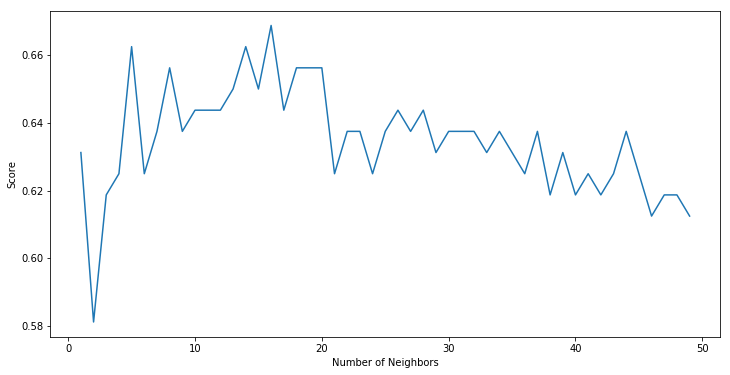

In [57]:
figure(figsize=(12,6))
plot(range(1,50), score_by_nn)
xlabel('Number of Neighbors')
ylabel('Score')

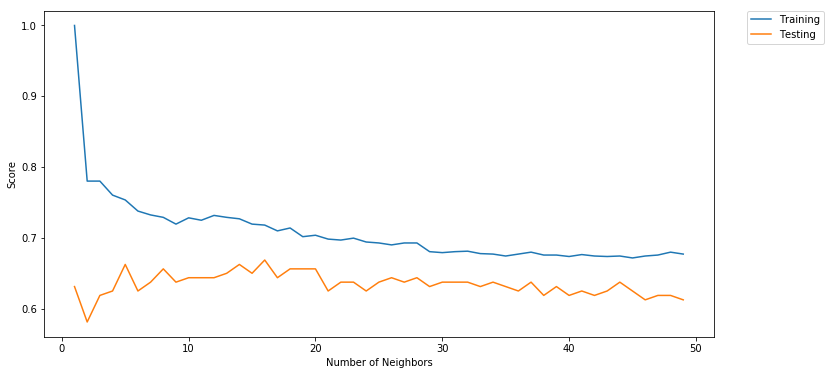

In [63]:
score_by_nn_train = []
score_by_nn_test = []
for num_neighbors in range(1,50):
    classifier = neighbors.KNeighborsClassifier(num_neighbors)
    classifier.fit(X_train, y_train)
    score_by_nn_train.append( classifier.score(X_train, y_train) )
    score_by_nn_test.append( classifier.score(X_test, y_test) )
figure(figsize=(12,6))
plot(range(1,50), score_by_nn_train, label="Training")
plot(range(1,50), score_by_nn_test, label="Testing")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel('Number of Neighbors')
ylabel('Score')

### Comparing classifiers on the original vector space

In [65]:
X = np.array( features )
y = np.array( labels )

In [66]:
X.shape

(1625, 48)

In [67]:
classifiers = ['SVM-linear', 
               'SVM-nonlinear', 
               'kNN']
all_scores = {'SVM-linear': [], 
              'SVM-nonlinear': [], 
              'kNN': []}

splitter = StratifiedKFold(n_splits=10)

for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]   
    
    
    for clf in classifiers:
        
        # declare classifier
        if (clf=='SVM-linear'):
            classifier = svm.SVC(kernel='linear')
        elif (clf=='SVM-nonlinear'):
            classifier = svm.SVC(kernel='rbf')
        elif (clf=='kNN'):
            classifier = neighbors.KNeighborsClassifier()
            
        # train classifier
        classifier.fit(X_train,y_train)

        # compute score on testing dataset and store it
        score = classifier.score(X_test,y_test)
        all_scores[clf].append(score)  
    
        # print score
        print(clf, 'score: %.2f%%'%(score*100)) 

SVM-linear score: 87.27%
SVM-nonlinear score: 20.00%
kNN score: 82.42%
SVM-linear score: 76.36%
SVM-nonlinear score: 20.00%
kNN score: 89.70%
SVM-linear score: 82.42%
SVM-nonlinear score: 20.00%
kNN score: 89.09%
SVM-linear score: 85.45%
SVM-nonlinear score: 20.00%
kNN score: 86.06%
SVM-linear score: 80.61%
SVM-nonlinear score: 21.82%
kNN score: 86.67%
SVM-linear score: 83.75%
SVM-nonlinear score: 21.88%
kNN score: 81.88%
SVM-linear score: 93.75%
SVM-nonlinear score: 22.50%
kNN score: 95.00%
SVM-linear score: 85.62%
SVM-nonlinear score: 22.50%
kNN score: 86.88%
SVM-linear score: 80.62%
SVM-nonlinear score: 20.00%
kNN score: 68.12%
SVM-linear score: 68.75%
SVM-nonlinear score: 20.00%
kNN score: 64.38%


In [68]:
for clf in classifiers:
    print('-', clf, 'mean score: %.2f%%'%(np.mean(all_scores[clf])*100))

- SVM-linear mean score: 82.46%
- SVM-nonlinear mean score: 20.87%
- kNN mean score: 83.02%


**Conclusions**
* Classification accuracies are better than in the case of 2-dimensions
* kNN and SVM linear are returning ~ the same results
* Non-linear SVM returns classification accuracy at **chance level** (20%)

### Preprocessing

Some techniques are sensitive to the input vectors range, such as non linear SVM.

In [94]:
classifiers = ['SVM-linear', 'SVM-nonlinear', 'kNN']
all_scores = {'SVM-linear': [], 'SVM-nonlinear': [], 'kNN': []}

splitter = StratifiedKFold(n_splits=10)

# preprocessing: center and scale
X = np.subtract( X, np.mean(X, axis=0) )
X = np.divide( X, np.std(X, axis=0) )

for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]   
    
    
    for clf in classifiers:
        
        # declare classifier
        if (clf=='SVM-linear'):
            classifier = svm.SVC(kernel='linear')
        elif (clf=='SVM-nonlinear'):
            classifier = svm.SVC(kernel='rbf')
        elif (clf=='kNN'):
            classifier = neighbors.KNeighborsClassifier()
            
        # train classifier
        classifier.fit(X_train,y_train)

        # compute score on testing dataset and store it
        score = classifier.score(X_test,y_test)
        all_scores[clf].append(score)  
    
for clf in classifiers:
    print('-', clf, 'mean score: %.2f%%'%(np.mean(all_scores[clf])*100))

- SVM-linear mean score: 67.85%
- SVM-nonlinear mean score: 64.44%
- kNN mean score: 60.96%


**NOTE**
* Sklearn has several functions to pre-process data before feeding them to some classifiers or regressors
* More: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Another useful step is to reduce dimensions of the input vector space

In [166]:
features = []
for c in classes:
    for e in excerpts:
        data = np.loadtxt('datasets/features/%s_%03i.mfcc'%(c,e), delimiter=',')
        for d_vect in data:
            features.append(list(d_vect))
X = np.array( features )

#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X)
#X = scaler.transform(X)

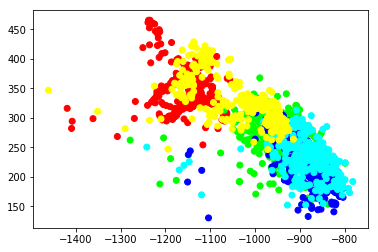

In [167]:
scatter(X[:,0], X[:,1], c=label_colors)

In [168]:
classifiers = ['SVM-linear', 'SVM-nonlinear', 'kNN']
all_scores = {'SVM-linear': [], 'SVM-nonlinear': [], 'kNN': []}
splitter = StratifiedKFold(n_splits=10)
for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]   
    
    
    for clf in classifiers:
        
        # declare classifier
        if (clf=='SVM-linear'):
            classifier = svm.SVC(kernel='linear')
        elif (clf=='SVM-nonlinear'):
            classifier = svm.SVC(kernel='rbf')
        elif (clf=='kNN'):
            classifier = neighbors.KNeighborsClassifier()
            
        # train classifier
        classifier.fit(X_train,y_train)

        # compute score on testing dataset and store it
        score = classifier.score(X_test,y_test)
        all_scores[clf].append(score)  
    
for clf in classifiers:
    print('-', clf, 'mean score: %.2f%%'%(np.mean(all_scores[clf])*100))

- SVM-linear mean score: 82.46%
- SVM-nonlinear mean score: 20.87%
- kNN mean score: 83.02%


In [169]:
from sklearn.decomposition import PCA

In [176]:
pca = PCA()

In [177]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

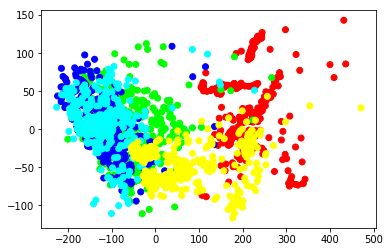

In [183]:
X_proj = pca.transform(X)
scatter(X_proj[:,0], X_proj[:,1], c=label_colors)

In [184]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.77146207,  0.85554412,  0.88651002,  0.90564066,  0.91935858,
        0.92807331,  0.93611585,  0.94250379,  0.94786097,  0.95274344,
        0.95701185,  0.96089289,  0.96444828,  0.9679096 ,  0.97108453,
        0.97357381,  0.97579118,  0.9779416 ,  0.97980783,  0.98151419,
        0.98312323,  0.98468318,  0.98610242,  0.98748711,  0.98872391,
        0.9898044 ,  0.99086391,  0.99190091,  0.99278573,  0.99355374,
        0.99427249,  0.99494717,  0.99557503,  0.99617562,  0.99671003,
        0.99723311,  0.99770655,  0.99814364,  0.99851203,  0.9988378 ,
        0.999133  ,  0.99936454,  0.99957003,  0.99970679,  0.9998316 ,
        0.99992951,  0.99999478,  1.        ])

In [181]:
X_proj = X_proj[:,:10]

In [182]:
classifiers = ['SVM-linear', 'SVM-nonlinear', 'kNN']
all_scores = {'SVM-linear': [], 'SVM-nonlinear': [], 'kNN': []}
splitter = StratifiedKFold(n_splits=10)
for train_index, test_index in splitter.split(X_proj,y):
    # select training and testing datasets
    X_train = X_proj[train_index]
    y_train = y[train_index]
    X_test = X_proj[test_index]
    y_test = y[test_index]   
    
    for clf in classifiers:
        
        # declare classifier
        if (clf=='SVM-linear'):
            classifier = svm.SVC(kernel='linear')
        elif (clf=='SVM-nonlinear'):
            classifier = svm.SVC(kernel='rbf')
        elif (clf=='kNN'):
            classifier = neighbors.KNeighborsClassifier()
            
        # train classifier
        classifier.fit(X_train,y_train)

        # compute score on testing dataset and store it
        score = classifier.score(X_test,y_test)
        all_scores[clf].append(score)  
    
for clf in classifiers:
    print('-', clf, 'mean score: %.2f%%'%(np.mean(all_scores[clf])*100))

- SVM-linear mean score: 76.82%
- SVM-nonlinear mean score: 20.61%
- kNN mean score: 79.13%


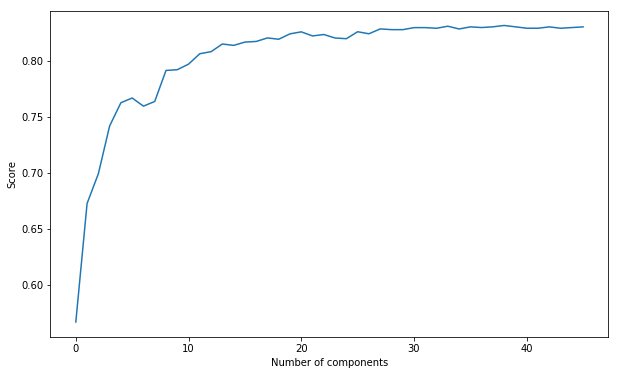

In [193]:
scores = []
splitter = StratifiedKFold(n_splits=10)

for pc in range(2,48):
    
    X_proj = pca.transform(X)[:,:pc]

    score_test = []
    for train_index, test_index in splitter.split(X_proj,y):
        X_train, X_test = X_proj[train_index], X_proj[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = neighbors.KNeighborsClassifier()
        classifier.fit(X_train,y_train)
        score_test.append( classifier.score(X_test,y_test) )  
    scores.append(np.mean(score_test))

figure(figsize=(10,6))
plot(scores)
xlabel("Number of components")
ylabel("Score")

In [196]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf')
kpca.fit(X)
X_proj = kpca.transform(X)

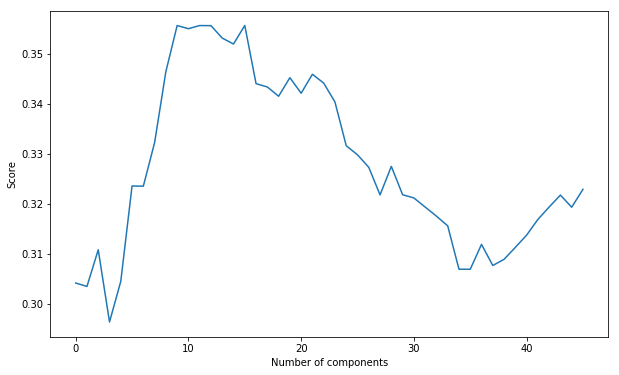

In [197]:
scores = []
splitter = StratifiedKFold(n_splits=10)

for pc in range(2,48):
    
    X_proj = kpca.transform(X)[:,:pc]

    score_test = []
    for train_index, test_index in splitter.split(X_proj,y):
        X_train, X_test = X_proj[train_index], X_proj[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = neighbors.KNeighborsClassifier()
        classifier.fit(X_train,y_train)
        score_test.append( classifier.score(X_test,y_test) )  
    scores.append(np.mean(score_test))

figure(figsize=(10,6))
plot(scores)
xlabel("Number of components")
ylabel("Score")

___
About this material: copyright Baptiste Caramiaux (write me for any questions or use of this material [email](mailto:baptiste.caramiaux@ircam.fr))
___